In [1]:
# importar librerías necesarias librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # nos permite hacer gráficos
import seaborn as sns #nos permite hacer gráficos bonitos

In [2]:
#se guardan la info del csv en un Dataframe de Pandas
properties_colombia_train = pd.read_csv('datasets/properties_colombia_train.csv')
properties_colombia_test = pd.read_csv('datasets/properties_colombia_test.csv')

In [ ]:
#ver la como se compone
properties_colombia_train.head()

In [38]:
#le cambiamos el formato a los flotantes (sobretodo el precio) para que no se vea tan raro
pd.options.display.float_format = '{:,.2f}'.format

In [34]:
#ver el tamaño del dataset de entrenamiento y de test
print(f'tamaño set entrenamiento: {properties_colombia_train.shape}, tamaño set test{properties_colombia_test.shape}')


tamaño set entrenamiento: (197549, 27), tamaño set test(65850, 26)


In [28]:
#veo las principales indicadores estadísticos (del set train)
properties_colombia_train.describe()
#algunos detalles: 
# - el mx de bedroom cambia bastante pero el desvío standar no (todo ok ahí)
# - los datos de surdace_covered varían un poco -.- 


,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,197549.000000,148051.000000,148051.000000,27537.000000,40525.000000,156467.000000,6974.000000,9.802000e+03,1.974860e+05
mean,497437.843851,5.666001,-75.041045,3.291208,3.239062,2.639279,1352.132349,9.483356e+02,6.436051e+08
std,290023.578338,2.196804,1.104575,1.754795,1.985636,1.437174,7713.769352,3.730875e+04,1.944868e+09
min,0.000000,-32.787342,-119.698190,1.000000,0.000000,1.000000,10.000000,1.000000e+00,0.000000e+00
25%,234211.000000,4.582315,-75.645126,3.000000,3.000000,2.000000,72.000000,7.100000e+01,2.000000e+08
50%,507385.000000,4.908611,-75.476654,3.000000,3.000000,2.000000,120.000000,1.140000e+02,3.300000e+08
75%,770037.000000,6.248101,-74.094001,4.000000,4.000000,3.000000,281.000000,2.160000e+02,6.000000e+08
max,993551.000000,34.420334,-67.482570,40.000000,96.000000,20.000000,180000.000000,3.480000e+06,3.450000e+11


In [30]:
#veo las principales indicadores estadísticos (del set test) a ver si hay mucha diferencia con el train -.-
properties_colombia_test.describe()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,65850.000000,49433.000000,49433.000000,9110.000000,13403.000000,52054.000000,2314.000000,3.305000e+03
mean,500260.289263,5.686868,-75.042164,3.282327,3.236813,2.639624,1355.283924,5.616338e+03
std,290438.140244,2.217177,1.098202,1.702092,1.972357,1.426015,9409.882547,3.012933e+05
min,4.000000,-4.203165,-81.705052,1.000000,0.000000,1.000000,10.000000,1.000000e+00
25%,235030.500000,4.582000,-75.644727,3.000000,3.000000,2.000000,74.000000,7.100000e+01
50%,509299.500000,4.918677,-75.476071,3.000000,3.000000,2.000000,120.000000,1.150000e+02
75%,772024.500000,6.251822,-74.094765,4.000000,4.000000,3.000000,274.500000,2.130000e+02
max,993559.000000,13.338761,-67.924336,40.000000,60.000000,20.000000,200000.000000,1.732000e+07


In [40]:
#Se saca el promedio de la columnas precios para poder dividir la variable objetivo 

media = properties_colombia_train['price'].mean()
print(media)

643605091.0064613


In [6]:
#comparo entre media y mediana. Puede que haya mas casas caras que baratas 
print(properties_colombia_train['price'].mean())
print(properties_colombia_train['price'].median())


643605091.0064613
330000000.0


In [47]:
#cambiar las variables a Caro=1, Barato=0
properties_colombia_train['target'] = pd.cut(x = properties_colombia_train['price'],
                       bins=[properties_colombia_train['price'].min()-1,
                             properties_colombia_train['price'].mean(),
                             properties_colombia_train['price'].max()+1], 
                       labels=['0', '1'])

In [ ]:
properties_colombia_train

In [52]:
#ver cuantos hay de cada uno 
properties_colombia_train.y_target.value_counts()

0    151191
1     46358
Name: y_target, dtype: int64

1. Valores faltantes

In [59]:
#importamos libreria de missingno para ver los faltantes
#pip install missingno 
import missingno as msno

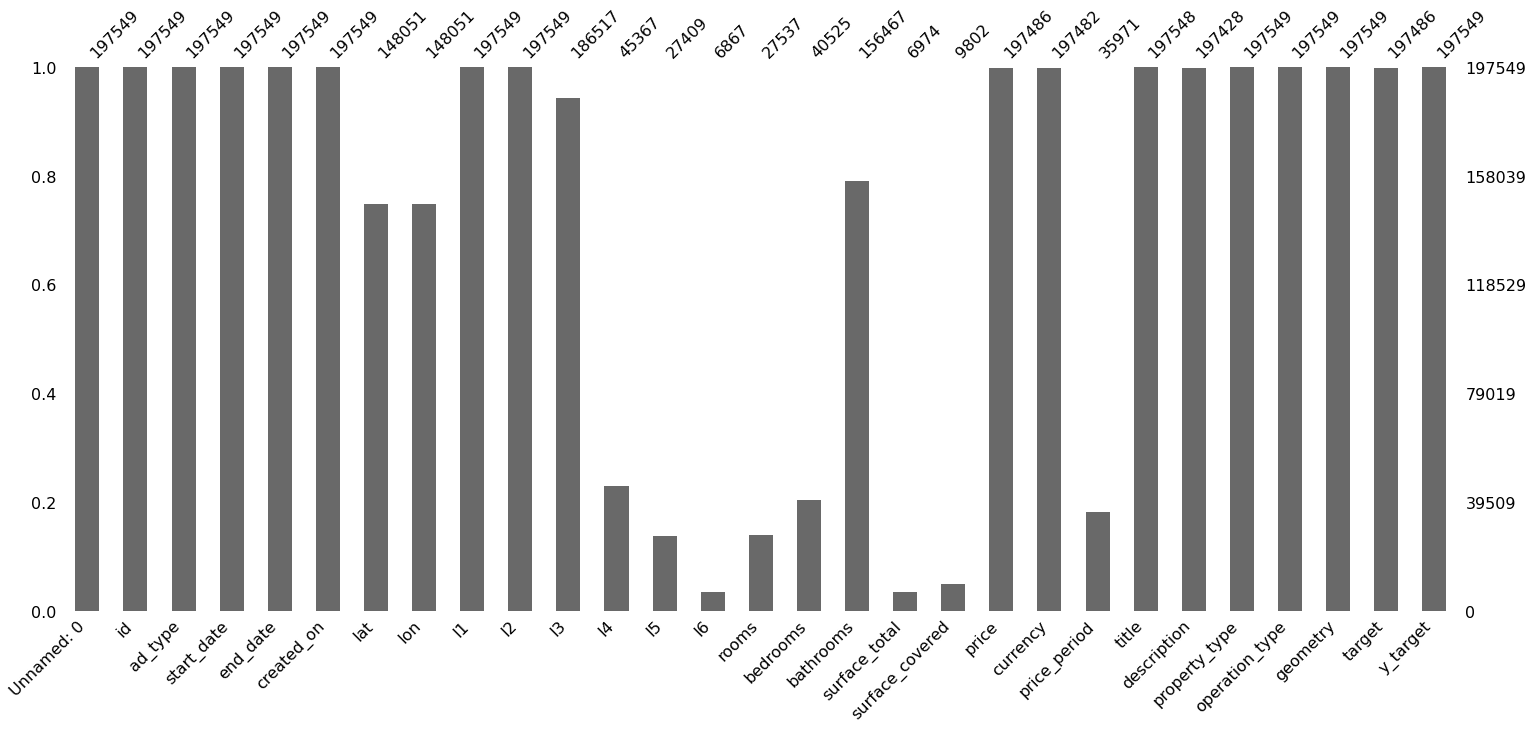

In [60]:
msno.bar(properties_colombia_train)
plt.show()